In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"weight-height.csv")
df.drop(["Weight"],axis=1,inplace=True)
df.head(5)

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.corr()

,Height
Height,1.0


In [ ]:
df.shape

In [ ]:
df.info()

In [4]:
df.Height.min()

54.2631333250971

In [5]:
df.Height.max()

78.9987423463896

In [6]:
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


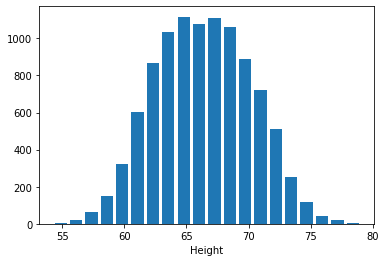

In [7]:
%matplotlib inline
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel("Height")
plt.show()

In [8]:
from scipy.stats import norm
import numpy as np

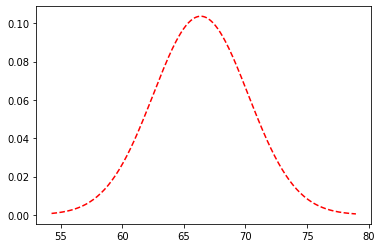

In [9]:
rng = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()),'r--')

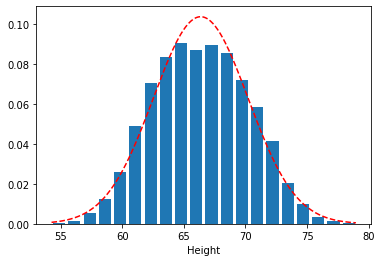

In [10]:
#%matplotlib inline
plt.hist(df.Height,bins=20,rwidth=0.8,density=True)
plt.xlabel("Height")

rng = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()),'r--')


<h3 style="color:green"> you can decide threshold for outliers , I am taking 3 std dev

In [11]:
upper_lmt = df.Height.mean()+3*df.Height.std()
lower_lmt = df.Height.mean()-3*df.Height.std()
print(upper_lmt,lower_lmt)


77.91014411714093 54.82497539250156


<h3 style="color:purple">upper_lmt : means any point greator than upper_lmt will be consider as outlier .</h3>
    
<h3 style="color:purple">lower_lmt : means any point below  lower_lmt will be consider as outlier .

In [12]:
outliers = df[(df.Height>upper_lmt) | (df.Height < lower_lmt)]

In [13]:
outliers.shape

(7, 2)

In [15]:
df_new = df[(df['Height']<upper_lmt) & (df['Height']>lower_lmt)]
print("with outliers shape is :",df.shape)
print("without outliers shape is",df_new.shape)

with outliers shape is : (10000, 2)
without outliers shape is (9993, 2)


In [16]:
df_new.corr()

,Height
Height,1.0


<h2 style="color:green"> outliers detection and removal using score </h2>
<h2 style="color:navy">  Z score

<h2 style="color:green"> - Z score is way to achieve same thing that we did above in opaart 1 </h2>
   <h2 style="color:green"> Zacore Ascore locates 